In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Making a initialization of class
from src.chip_analysis.data_summary import DataProcess

# Load your dataset
#Put my own path here
my_file_path = 'https://raw.githubusercontent.com/Zhengnan817/Project-3-Data-Reconstruction-and-Analysis/main/src/chip_analysis/data/chip_dataset.csv'
cpu_table = DataProcess(my_file_path)
df = cpu_table.view_data()
df.head()

# Divide the dataset into three parts: train, validate, and EDA
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
validate_df, eda_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Define features and target variable for training
X_train = train_df.drop("Vendor", axis=1)  # Features
y_train = train_df["Vendor"]  # Target variable

# Define features and target variable for validation during cross-validation
X_validate = validate_df.drop("Vendor", axis=1)  # Features
y_validate = validate_df["Vendor"]  # Target variable

# Define features for EDA
eda_features = eda_df.drop("Vendor", axis=1)  # Features for EDA

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = ["Process Size", "TDP", "Die Size", "Transistors", "Freq"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ["Release Date"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with a classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Evaluate the model using cross-validation on the validation set
cv_scores = cross_val_score(model, X_validate, y_validate, cv=5)
print("Cross-validation scores on validation set:", cv_scores)
print("Mean CV score on validation set:", cv_scores.mean())

# Fit the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy = (y_pred == y_test).mean()
print("Test set accuracy:", accuracy)

NameError: name 'LogisticRegression' is not defined

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 3038 to 3379
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product       700 non-null    object        
 1   Type          700 non-null    object        
 2   Release Date  700 non-null    datetime64[ns]
 3   Process Size  700 non-null    int64         
 4   TDP           700 non-null    int64         
 5   Die Size      665 non-null    float64       
 6   Transistors   700 non-null    int64         
 7   Freq          700 non-null    int64         
 8   Vendor        700 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 70.9+ KB
None

Descriptive Statistics:
                        Release Date  Process Size         TDP    Die Size  \
count                            700    700.000000  700.000000  665.000000   
mean   2010-10-15 07:38:44.571428352     54.820000   83.028571  1

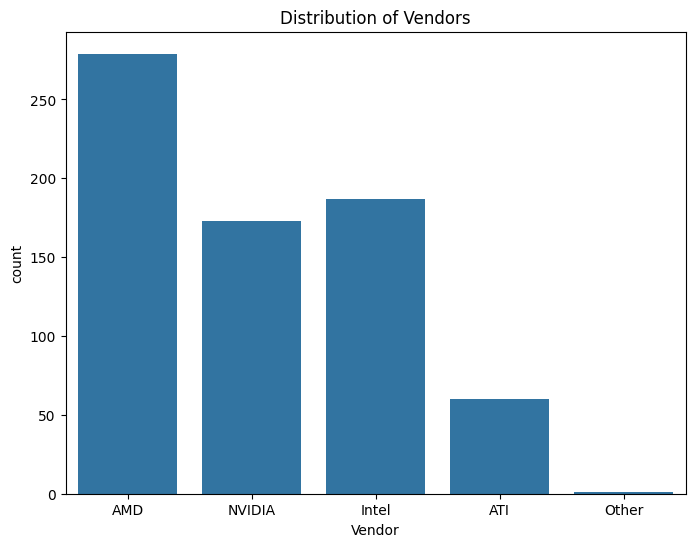

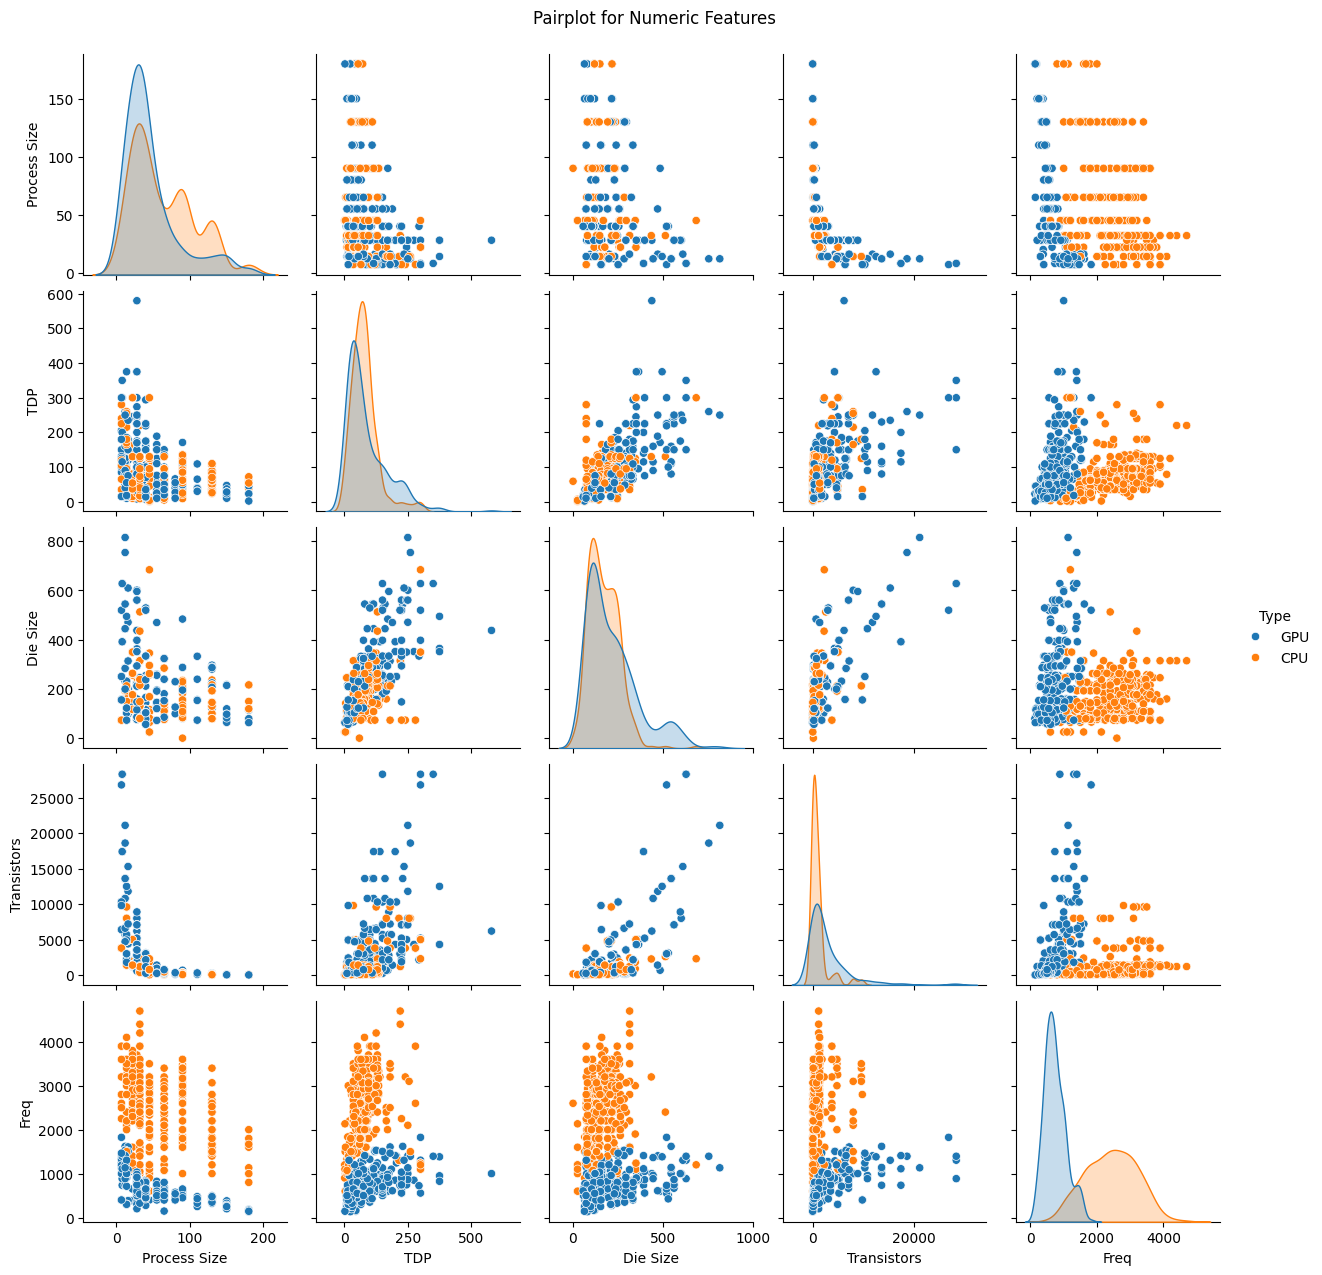

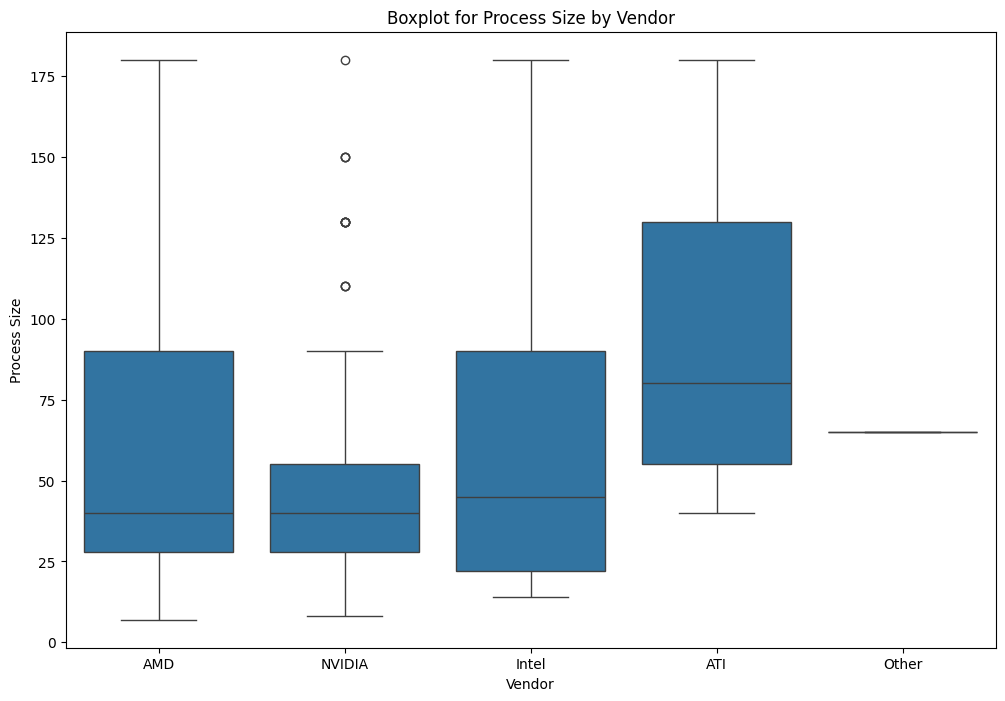

In [31]:

print("Dataset Info:")
print(eda_df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(eda_df.describe())

# # Correlation matrix
# correlation_matrix = eda_df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title("Correlation Matrix")
# plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Vendor', data=eda_df)
plt.title("Distribution of Vendors")
plt.show()

# Pairplot for numeric features
sns.pairplot(eda_df, hue='Type', diag_kind='kde')
plt.suptitle("Pairplot for Numeric Features", y=1.02)
plt.show()

# Boxplot for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vendor', y='Process Size', data=eda_df)
plt.title("Boxplot for Process Size by Vendor")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   Freq   R-squared:                      -0.047
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                nan
Time:                        17:01:13   Log-Likelihood:                -5866.5
No. Observations:                 700   AIC:                         1.173e+04
Df Residuals:                     699   BIC:                         1.174e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.245e-34   2.35e-35     39.262   

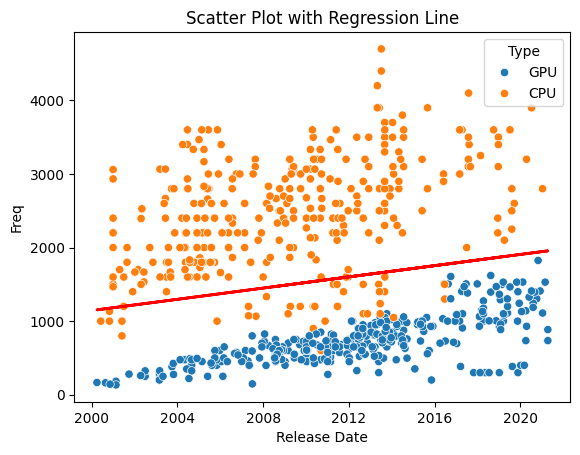

In [30]:
eda_df['Release Date'] = pd.to_datetime(
            eda_df['Release Date'], format='%m/%d/%y'
        )
X = sm.add_constant(eda_df['Release Date'].astype(int))
y = eda_df['Freq']

model = sm.OLS(y, X)
results = model.fit()

# Display regression summary
print(results.summary())

# Plotting the scatter plot
sns.scatterplot(data=eda_df, x='Release Date', y='Freq', hue='Type')
plt.title('Scatter Plot with Regression Line')

# Plotting the regression line
plt.plot(eda_df['Release Date'], results.predict(X), color='red', linewidth=2)

plt.show()